In [5]:
import menpo.io as mio
from menpo.visualize import print_progress
from menpo.landmark import labeller, face_ibug_68_to_face_ibug_68_trimesh

path_to_images = '/Users/lls/Documents/face/data/source/'
training_images = []
for img in print_progress(mio.import_images(path_to_images, verbose=True)):
    # convert to greyscale
    if img.n_channels == 3:
        img = img.as_greyscale()
    # crop to landmarks bounding box with an extra 20% padding
    img = img.crop_to_landmarks_proportion(0.2)
    # rescale image if its diagonal is bigger than 400 pixels
    d = img.diagonal()
    if d > 400:
        img = img.rescale(400.0 / d)
    # define a TriMesh which will be useful for Piecewise Affine Warp of HolisticAAM
    labeller(img, 'PTS', face_ibug_68_to_face_ibug_68_trimesh)
    # append to list
    training_images.append(img)

Found 20 assets, index the returned LazyList to import.
[====================] 100% (20/20) - done.                                     


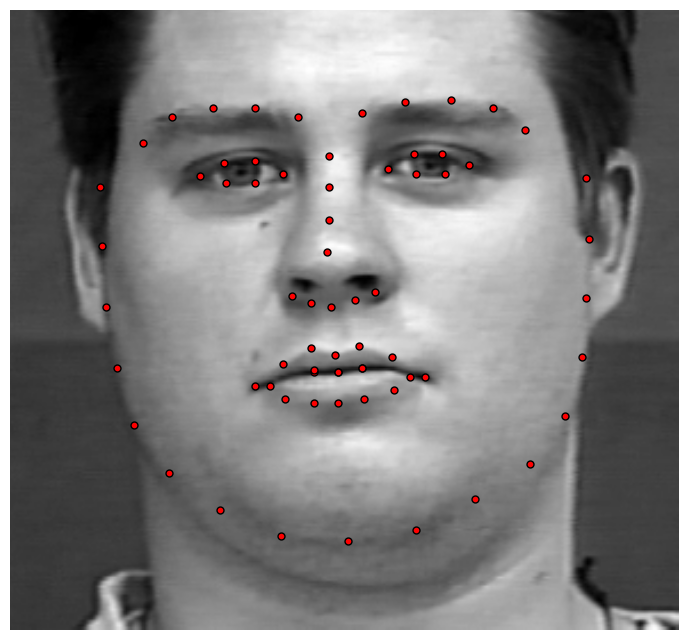

In [6]:
%matplotlib inline
from menpowidgets import visualize_images
visualize_images(training_images)

In [7]:
from pathlib import Path
import menpo.io as mio
from menpo.visualize import print_progress

path_to_lfpw = Path('/Users/lls/Documents/face/data/source/')

training_shapes = []
for lg in print_progress(mio.import_landmark_files(path_to_lfpw / '*.pts', verbose=True)):
    training_shapes.append(lg['all'])

Found 20 assets, index the returned LazyList to import.
[====================] 100% (20/20) - done.                                     
